**Pérez Angeles Adrián**

#Introducción


**Este texto esta basado en el dataset
[Physics vs Chemistry vs Biology](https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology/code)**

La idea de este proyecto es poder entrenar una red neuronal mediante NLP, se tuvieron varias complicaciones al inicio a la hora de querer vectorizar los datos, pero mediante la seccion "Analizando los datos de entrada" se logro tratar el df adecuadamente para posteriormente vectorizar adecuadamente los datos.

La siguiente complicación fue a la hora de querer implementar el modelo con los datos ya vectorizados, para ellos se tomo la funcion de perdida "sparse_categorical_crossentropy" pues esta es utilizada en modelos de multiclasificación cuando se implementa una tokenización de tipo entero. A diferencia de "categorical_crossentropy" que es cuando se implementa one-hot.

Se utilizaron 3 capaz densas de salida debido a que se buscaba clasificacar textos entre 3 topicos(Fisica, Quimica y Biologia) junto con la activación Softmax que es utilizada para multiclasificación.


Este programa muestra un error en la evaluacion del modelo en los datos de test que desgraciadamente no fue posible identificar. **Se pudo arreglar**

**Se tuvo en el modelo implementando transforme un Test accuracy de 0.786**

En este caso, no era optimo utilizar words embedings pre-entrenados debido a que la data es mas especifica a unos textos generales como en el caso de los ya entrenados

#Extraemos la data

**Importando el conjunto de datos de Kaggle**

In [1]:
from google.colab import files
files.upload()

Saving physics-vs-chemistry-vs-biology.zip to physics-vs-chemistry-vs-biology.zip


{'physics-vs-chemistry-vs-biology.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xe9AaS[\xd5/\xc9\xff\xff\xff\xff\xff\xff\xff\xff\x10\x00\x14\x00dataset/test.csv\x01\x00\x10\x00\xd5p\x0b\x00\x00\x00\x00\x00\xcc\x9b\x04\x00\x00\x00\x00\x00\xd4\xbd\xd9\x92\x1cW\x92%\xf8>_a\x0c\x116#\x98\x1e\x1e\x0bv\xa4dB@\x00$P\x89-\tT\xb2r2\xa7Y\xd7\xcd\xae\xbb\x1b\xc3\x16\xa7-\x11p\xca<\xe4\x88\xcc\'\xccC\xb7H\x8f\xf4[?\xf77\xf4\xa7\xe4\x17\xf4\'\x8c\x9e\xa3\xaa\xd7\xcc\x03\xcc*\x91y\xeb\xea.V \xc2\xec\xda]\xf4\xeazT\xf5U\xb1x\xd6\xd6ul\x86\xc5\xc7vW\xe6\xff\xdb\xf9\xa7\x8b\x10\x1e-\x8e\xde\xc7\xaeo\x9bPU\xfb\xecU\xb6\r\xd71k\xda\xac,b\xc8n\xb6a\xc8j\xf9\xf5\x1f\xb3\xb2_f\xaf\xfe\xfe\xb7\xff\x8c\xbf\xc6\xeb\xd8e\xab\x18\x9bl\x88\xfd\x10\x8be\xf6\xb2\xbd\xc1/\x17\xd9\xb0\x8d\xfc\xa5<\x9f\x85&k\xc7\xa1\x08\xf2\xc4"+\x9b\x90\xe7c\'\xff\xe0\xcf\xbb]\xd7\xee\xbaR\xfe\x99\xd51\xf4cW6\x9blh\xdbJF\x90onC\xaf\x1f\xa8B\xb7\x892\xb1\xb0\nM\xd16\xb1\xc8V\xf2\x8f|\x18C\x95\xf5y\x19\x9b<.\xb3w\x8d<\xf1&6}\xc8\xf2\xd0E|\xb

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download vivmankar/physics-vs-chemistry-vs-biology

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
!unzip physics-vs-chemistry-vs-biology.zip

Archive:  physics-vs-chemistry-vs-biology.zip
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


Nos percatamos que luego de extraer el archivo de kaggle el data set esta en test.csv y train.csv, extraemos la data con pandas

In [5]:
import pandas as pd

train=pd.read_csv('dataset/train.csv') #leemos los datos de train.csv y test.csv y los definimos ya leidos en train y test
test=pd.read_csv('dataset/test.csv')

#Analizamos el dataset

In [6]:
train.head() #desplegamos las primeras 5 muestras

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [10]:
train.describe()
#test.describe()

,Id,Comment,Topic
count,8695,8695,8695
unique,8695,7950,3
top,0x840,[removed],Biology
freq,1,114,3591


In [11]:
train.shape

(8695, 3)

In [12]:
train['Topic'].value_counts()

Biology      3591
Chemistry    2920
Physics      2184
Name: Topic, dtype: int64

# Preparando la data

In [ ]:
#borramos la columna ID pues no la utilizaremos
train=train.drop(["Id"],axis='columns')

Notamos que hay varios textos de biologia con texto removido, por lo que se procede a borrarlos

In [13]:
#.query consulta las columnas de el df con un condicionante booleano
train=train.query("Comment not in ('[removed]','[deleted]')")

In [14]:
train['Topic'].value_counts()

Biology      3566
Chemistry    2897
Physics      2053
Name: Topic, dtype: int64

In [15]:
test['Topic'].value_counts()

Biology      614
Chemistry    506
Physics      466
Name: Topic, dtype: int64

In [16]:
train['Topic']

0         Biology
1         Physics
2         Biology
3         Biology
4       Chemistry
          ...    
8690      Biology
8691      Biology
8692    Chemistry
8693      Biology
8694      Biology
Name: Topic, Length: 8516, dtype: object

In [17]:
#le asignamos un valor numerico a cada topico mediante un mapeo a partir de un diccionario
train['Topic']=train['Topic'].map({'Biology':0,'Chemistry':1,'Physics':2})

In [18]:
train['Topic']

0       0
1       2
2       0
3       0
4       1
       ..
8690    0
8691    0
8692    1
8693    0
8694    0
Name: Topic, Length: 8516, dtype: int64

In [19]:
test['Topic']

0         Biology
1         Physics
2         Biology
3       Chemistry
4         Physics
          ...    
1581    Chemistry
1582      Biology
1583    Chemistry
1584      Biology
1585      Physics
Name: Topic, Length: 1586, dtype: object

In [20]:
dic={'Biology':0,'Chemistry':1,'Physics':2}


In [21]:
test['Topic']=test['Topic'].map(dic)

In [22]:
test['Topic']

0       0
1       2
2       0
3       1
4       2
       ..
1581    1
1582    0
1583    1
1584    0
1585    2
Name: Topic, Length: 1586, dtype: int64

In [23]:
import re

def remove_html(text):                                   #definimos funcion para remover texto html
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)
def remove_emoji(string):                                #analogamente para remover emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

train['Comment'] = train['Comment'].apply(lambda x: remove_emoji(x))
train['Comment'] = train['Comment'].apply(lambda x: remove_html(x))

test['Comment'] = test['Comment'].apply(lambda x: remove_emoji(x))
test['Comment'] = test['Comment'].apply(lambda x: remove_html(x))

In [24]:
train['Comment'] = train['Comment'].astype('string')
test['Comment'] = test['Comment'].astype('string')

In [25]:
train['Comment'][0]

'A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food.  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness. \\n\\nMore likely on a *year to year* basis, the population is experiencing fluctuating selection where a

In [26]:
def remove_characters(text):
  character = re.compile(r"""[!?'".<>(){}@%&*\-/\[/]""")
  return character.sub(r'',text)

train['Comment'] = train['Comment'].apply(lambda x: remove_characters(x))
test['Comment'] = test['Comment'].apply(lambda x: remove_characters(x))

In [ ]:
#train['Comment']=train['Comment'].replace( "\\" , "" )
#test['Comment']=test['Comment'].replace( "\\" , "" )

In [27]:
train['Comment'][0]

'A few things You might have negative frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed This cycle continues perpetually \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness \\n\\nMore likely on a year to year basis, the population is experiencing fluctuating selection where alternating

In [ ]:
#!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 175 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c441e340cc9306094a3a96ae1806001eb91e569dc5331b942bcf644cafdb67d1
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
#from cleantext import clean
#train['Comment']=clean(train['Comment'], no_emoji=True)

In [28]:
len(train['Comment'].max())

71

**Preparando los datos de entrenamiento, validacion y testeo**

In [29]:
train=train.sample(frac=1).reset_index(drop=True)

In [30]:
#separamos los datos de entrenamiento y validación
train_s = int(0.8 * len(train))
val_s = int(0.2 * len(train))

In [31]:
import tensorflow as tf
train_1 = tf.data.Dataset.from_tensor_slices((train['Comment'],train['Topic']))
test_1= tf.data.Dataset.from_tensor_slices((test['Comment'],test['Topic']))

In [32]:
train_dataset = train_1.take(train_s)
train_dataset = train_dataset.shuffle(64).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = train_1.skip(train_s)
val_dataset = val_dataset.shuffle(64).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_1.shuffle(64).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [33]:
for inputs, targets in train_dataset:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int64'>
inputs[0]: tf.Tensor(b'The shot keeps you out of the hospital and prevents death from the virus Evidence is based on who is currently being admitted to hospital, unvaccinated individuals If the shot did nothing there would be equal numbers of vaccinated and non vaccinated peoples in hospitals and that\xe2\x80\x99s not what\xe2\x80\x99s happening', shape=(), dtype=string)
targets[0]: tf.Tensor(0, shape=(), dtype=int64)


**Vectorizando los datos**

In [34]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization

max_length = 455
max_tokens = 20526
text_vectorization = TextVectorization(  #preprosesamiento del ocnjunto de datos con capa de tectvectorizacion
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)
text_only_train_ds = train_dataset.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)
int_train_ds = train_dataset.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_dataset.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_dataset.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [35]:
for inputs, targets in int_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 455)
inputs.dtype: <dtype: 'int64'>
targets.shape: (32,)
targets.dtype: <dtype: 'int64'>
inputs[0]: tf.Tensor(
[  34   37   25 1445    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   

In [36]:
#asi se ven los datos vectorizados
for element in int_train_ds:
  print(element)

(<tf.Tensor: shape=(32, 455), dtype=int64, numpy=
array([[  26, 3604,   97, ...,    0,    0,    0],
       [8934,    8,   88, ...,    0,    0,    0],
       [ 201,    3,  231, ...,    0,    0,    0],
       ...,
       [ 117,   14,   48, ...,    0,    0,    0],
       [   2,  446,   11, ...,    0,    0,    0],
       [  29,  517,  731, ...,    0,    0,    0]])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 1, 2, 0, 0, 0, 0])>)
(<tf.Tensor: shape=(32, 455), dtype=int64, numpy=
array([[ 753,   64, 7599, ...,    0,    0,    0],
       [ 199,   77,    4, ...,    0,    0,    0],
       [  28,  116, 2970, ...,    0,    0,    0],
       ...,
       [  62,   25,  857, ...,    0,    0,    0],
       [ 263,   79,  237, ...,    0,    0,    0],
       [  12,   31,   15, ...,    0,    0,    0]])>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 

#Modelo (RNN)

**Definiendo el modelo**

In [37]:
import tensorflow as tf
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)          #aplicamos one hot encoding con dimensionalidad arriba de 200000
x = layers.Bidirectional(layers.LSTM(32))(embedded)      #construimos el modelo
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 20526)       0         
                                                                 
 bidirectional (Bidirection  (None, 64)                5263104   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 5263299 (20.08 MB)
Trainable params: 5263299 (20.08 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10, callbacks=callbacks)   #evaluamos el modelo
model = keras.models.load_model("one_hot_bidir_lstm.keras")                           #metemos one hot encoding, esto le tarda a la computadora, pero para operar conviene bastante en cuanto a operaciones matematicas
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Epoch 1/10
213/213 [==============================] - 47s 196ms/step - loss: 1.0569 - accuracy: 0.4394 - val_loss: 1.0210 - val_accuracy: 0.4624
Epoch 2/10
213/213 [==============================] - 42s 197ms/step - loss: 0.8890 - accuracy: 0.5913 - val_loss: 0.8528 - val_accuracy: 0.6144
Epoch 3/10
213/213 [==============================] - 43s 204ms/step - loss: 0.7327 - accuracy: 0.6916 - val_loss: 0.9004 - val_accuracy: 0.5945
Epoch 4/10
213/213 [==============================] - 42s 198ms/step - loss: 0.5905 - accuracy: 0.7706 - val_loss: 0.8132 - val_accuracy: 0.6555
Epoch 5/10
213/213 [==============================] - 42s 198ms/step - loss: 0.3934 - accuracy: 0.8567 - val_loss: 0.8009 - val_accuracy: 0.6667
Epoch 6/10
213/213 [==============================] - 43s 200ms/step - loss: 0.2738 - accuracy: 0.9030 - val_loss: 0.8958 - val_accuracy: 0.6778
Epoch 7/10
213/213 [==============================] - 43s 202ms/step - loss: 0.2251 - accuracy: 0.9263 - val_loss: 0.9072 - val_ac

Utilizamos por una parte embeding por los datos, no es tan grande como para utilizar onehot y por otra parte como es un problema de clasificación multiple tenemos que usar tanto softmax como activación en la capa de salida y nos interesa clasificar entre 3 topicos, fisica,quimica y biologia por lo que por eso de define 3 capaz densas de salida.

In [39]:
from tensorflow import keras             #definimos modelo
from tensorflow.keras import layers

embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=256)

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256,mask_zero=True)(inputs) #aplicamos el embeding a el imput en vez de one hot
#x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(embedded)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(32,activation='relu')(x)
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)                        #softmax pues es un problema de multiclasificacion y tres capaz densas
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",                 #sparse_categorical pues usamos entradas enteras en vez de one hot
                  metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 256)         5254656   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5328835 (20.33 MB)
Trainable params: 5328835 (20.33 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [40]:
callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru_with_masking.keras",
                                    save_best_only=True)                #en el callback pedimos que se guarda el modelo en la epoca donde mejor se ajusta a los datos de validación
]
history=model.fit(int_train_ds, validation_data=int_val_ds, epochs=20,callbacks=callbacks ) #epoca 3 drop 0.4 val_loss 0.7051
model = keras.models.load_model(
    "embeddings_bidir_gru_with_masking.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")


Epoch 1/20
213/213 [==============================] - 77s 319ms/step - loss: 1.0285 - accuracy: 0.4692 - val_loss: 0.9258 - val_accuracy: 0.5534
Epoch 2/20
213/213 [==============================] - 62s 290ms/step - loss: 0.7325 - accuracy: 0.6932 - val_loss: 0.7621 - val_accuracy: 0.6649
Epoch 3/20
213/213 [==============================] - 60s 281ms/step - loss: 0.5006 - accuracy: 0.8045 - val_loss: 0.8484 - val_accuracy: 0.6631
Epoch 4/20
213/213 [==============================] - 62s 291ms/step - loss: 0.3553 - accuracy: 0.8695 - val_loss: 0.8451 - val_accuracy: 0.6719
Epoch 5/20
213/213 [==============================] - 61s 288ms/step - loss: 0.2760 - accuracy: 0.9025 - val_loss: 0.8802 - val_accuracy: 0.6901
Epoch 6/20
213/213 [==============================] - 64s 301ms/step - loss: 0.2166 - accuracy: 0.9244 - val_loss: 1.0290 - val_accuracy: 0.6901
Epoch 7/20
213/213 [==============================] - 61s 289ms/step - loss: 0.1835 - accuracy: 0.9358 - val_loss: 1.1922 - val_ac

In [41]:
test_loss, test_acc = model.evaluate(int_test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

50/50 [==============================] - 1s 16ms/step - loss: 0.6221 - accuracy: 0.7711
Test Loss: 0.6220526695251465
Test Accuracy: 0.7711223363876343


In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 1.9130466083064674)

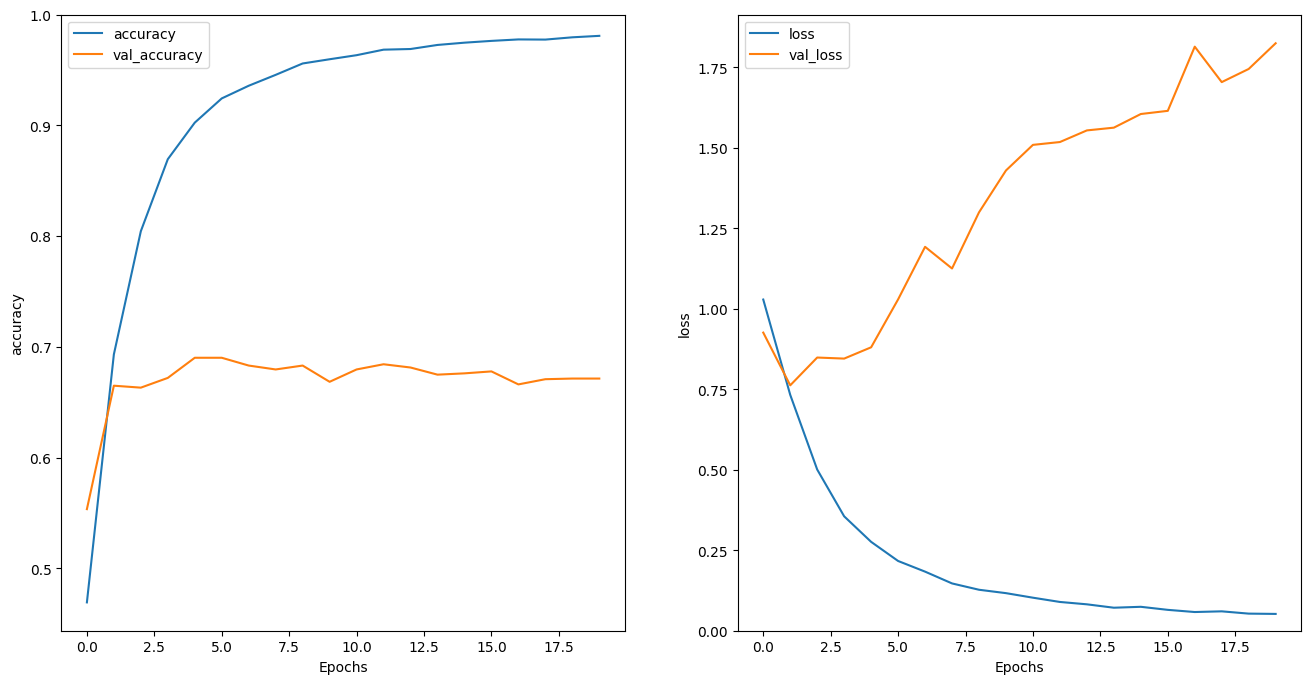

In [43]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

**Predicción de los datos de test**

In [44]:
import numpy as np

sample_text=int_test_ds

predictions = model.predict(sample_text)

50/50 [==============================] - 4s 12ms/step


In [45]:
n=3           #numero de prediccion de los datos de test.
predictions[n] #predicción del modelo sobre los datos de test

array([0.9658918 , 0.02810502, 0.00600319], dtype=float32)

In [46]:
test['Topic'][n]#Topico del dato de test

1

In [55]:
dic
def get_key(val):                  #definimos una función para poder obtener la llave de un diccionario.
    for key, value in dic.items():
         if val == value:
             return key

    return "There is no such Key"

print(get_key(test['Topic'][n]))

Chemistry


In [56]:
tab_pred=pd.DataFrame(data=predictions[n],index=dic, columns=['Prob'])
tab_pred

,Prob
Biology,0.965892
Chemistry,0.028105
Physics,0.006003


In [57]:
tab_pred.loc[tab_pred.Prob>=0.5,'Prob']=1
tab_pred.loc[tab_pred.Prob<0.5,'Prob']=0

In [58]:
tab_pred.columns=['Predicción']
tab_pred

,Predicción
Biology,1.0
Chemistry,0.0
Physics,0.0


In [59]:
test['Comment'][n]

'Is chemistry hard in uni Ive read somewhere that its the hardest degree But ive really been enjoying  chem in high school right now, and want to do something involving science after high school'

**Aplicando Transformer con embeding***

codificador transformer

In [ ]:
#aplcamos el transformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):  #definimos clase de funcion transformer
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config() #.get__config() es util para guardar y recobrar un modelo, al cargar el modelo hay que indicar las clases de capaz del modelo
        config.update({
            "embed_dim": self.embed_dim, #se especifican las capaz del modelo
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
class PositionalEmbedding(layers.Layer):            #definimos la clase de funciones para darle posicion al embedding para el trasnformer
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

In [ ]:
vocab_size = 20000
sequence_length = 455
embed_dim = 40
num_heads = 3
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs) #metemos el positionalembedding en vez de layer embedding
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)              #capa de transformer
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(3, activation="softmax")(x)                        #softmax pues es un problema de multiclasificacion y tres capaz densas
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",                 #sparse_categorical pues usamos entradas enteras en vez de one hot
                  metrics=["accuracy"])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posit  (None, None, 40)         818200    
 ionalEmbedding)                                                 
                                                                 
 transformer_encoder (Transf  (None, None, 40)         22392     
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 40)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                           

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("full_transformer_encoder.keras",
                                    save_best_only=True)                #en el callback pedimos que se guarda el modelo en la epoca donde mejor se ajusta a los datos de validación
]
history1=model.fit(int_train_ds, validation_data=int_val_ds, epochs=50, callbacks=callbacks)
model = keras.models.load_model(
    "full_transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder,
                    "PositionalEmbedding": PositionalEmbedding})
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Epoch 1/20
213/213 [==============================] - 6s 24ms/step - loss: 1.0795 - accuracy: 0.4091 - val_loss: 1.0773 - val_accuracy: 0.4120
Epoch 2/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0779 - accuracy: 0.4146 - val_loss: 1.0776 - val_accuracy: 0.4120
Epoch 3/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0784 - accuracy: 0.4165 - val_loss: 1.0773 - val_accuracy: 0.4120
Epoch 4/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0774 - accuracy: 0.4128 - val_loss: 1.0780 - val_accuracy: 0.4120
Epoch 5/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0774 - accuracy: 0.4135 - val_loss: 1.0773 - val_accuracy: 0.4120
Epoch 6/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0770 - accuracy: 0.4181 - val_loss: 1.0775 - val_accuracy: 0.4120
Epoch 7/20
213/213 [==============================] - 5s 24ms/step - loss: 1.0763 - accuracy: 0.4182 - val_loss: 1.0774 - val_accuracy: 0.4120

In [ ]:
test_loss, test_acc = model.evaluate(int_test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

50/50 [==============================] - 1s 16ms/step - loss: 0.5941 - accuracy: 0.7982
Test Loss: 0.5940807461738586
Test Accuracy: 0.7982345819473267


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 1.2574941202998162)

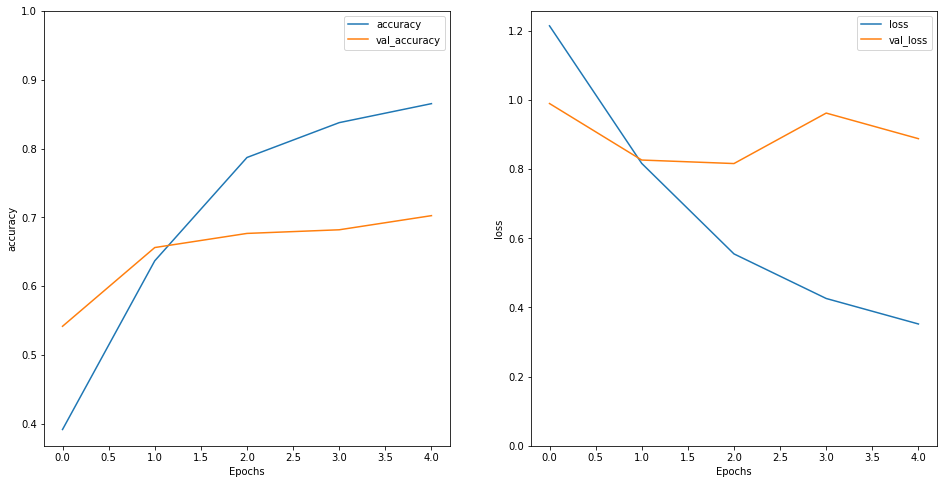

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text1=int_test_ds

predictions = model.predict(sample_text1)

In [ ]:
n=10            #numero de prediccion de los datos de test.
predictions[n] #predicción del modelo sobre los datos de test

array([0.00755698, 0.00572245, 0.98672056], dtype=float32)

In [ ]:
test['Comment'][n]

'Essentially, it is the change in volume between the transition state and the reactants. Formally, it is defined as -RTd(ln k)/dp. It thus gives an indication of how high pressures influence reactions.\\n\\nThough keep in mind, this doesnt account for a shift in the PES and isnt just a real volume, but a combination of van der waals shrinkage, electrostriction, electronic compression, ...'

In [ ]:
tab_predT=pd.DataFrame(data=predictions[n],index=dic_1, columns=['Prob'])
tab_predT

,Prob
Physics,0.007557
Biology,0.005722
Chemistry,0.986721


In [ ]:
tab_predT.loc[tab_pred.Prob>=0.5,'Prob']=1
tab_predT.loc[tab_pred.Prob<0.5,'Prob']=0
tab_predT.columns=['Predicción']
tab_predT

,Predicción
Physics,0.0
Biology,0.0
Chemistry,1.0


In [ ]:
print(get_key(test['Topic'][n]))

Chemistry


# Analizando los datos de entrada

**analisemos paso por paso la data para encontrar un entrenamiento correcto.**


In [ ]:
train

,Comment,Topic
0,A few things. You might have negative- frequen...,0
1,Is it so hard to believe that there exist part...,2
2,There are bees,0
3,I'm a medication technician. And that's alot o...,0
4,Cesium is such a pretty metal.,1
...,...,...
8690,I make similar observations over the last week...,0
8691,You would know.,0
8692,Also use the correct number of sig figs,1
8693,"What about the ethical delimmas, groundbreaki...",0


In [ ]:
train['Comment'][1]

"Is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\\n\\nI mean look how long it took humans to find out a way to detect radiation."

In [ ]:
import string #definicion de como vectorizar los datos para el procesamiento de lenguaje natural

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
vectorizer.make_vocabulary(train['Comment'][0])

In [ ]:
encoded_sentence = vectorizer.encode(train['Comment'][0]) #un ejemplo de como vectorizar
print(encoded_sentence)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Notemos que no todo el texto pudo ser procesado, tenemos que manipular los datos para quitarles signos de mas.**

In [ ]:
standardize_sentence=vectorizer.standardize(train['Comment'][0])
print(standardize_sentence)

a few things you might have negative frequency dependent selection going on where the least common phenotype reflected by genotype is going to have an advantage in the environment for instance if a prey animal such as a vole were to have a light and a dark phenotype a predator might recognize the more common phenotype as food  so if the light voles are more common foxes may be keeping a closer eye out for light phenotypic voles recognising them as good prey this would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed this cycle continues perpetually nnhowever this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness nnmore likely on a year to year basis the population is experiencing fluctuating selection where alternating conditions in th

In [ ]:
import re
import string
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",
)

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

In [ ]:
dataset = train['Comment']
text_vectorization.adapt(dataset)

In [ ]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'a',
 'of',
 'and',
 'is',
 'you',
 'it',
 'i',
 'in',
 'that',
 'for',
 'are',
 'be',
 'but',
 'this',
 'not',
 'with',
 'if',
 'have',
 'on',
 'as',
 'or',
 'can',
 'your',
 'so',
 'its',
 'they',
 'just',
 'like',
 'would',
 'from',
 'what',
 'an',
 'at',
 'was',
 'my',
 'we',
 'more',
 'do',
 'there',
 'will',
 'one',
 'some',
 'about',
 'no',
 'all',
 'get',
 'by',
 'think',
 'how',
 'out',
 'which',
 'because',
 'also',
 'me',
 'know',
 'up',
 'when',
 'then',
 'dont',
 'them',
 'has',
 'very',
 'time',
 'could',
 'people',
 'much',
 'other',
 'than',
 'it’s',
 'any',
 'im',
 'make',
 'into',
 'even',
 'only',
 'good',
 'really',
 'see',
 'way',
 'their',
 'same',
 'need',
 'water',
 'why',
 'use',
 'thats',
 'well',
 'most',
 'something',
 'energy',
 'where',
 'work',
 'here',
 'don’t',
 'does',
 'sure',
 'go',
 'lot',
 'different',
 'should',
 'want',
 'things',
 'had',
 'first',
 'being',
 'too',
 'probably',
 'been',
 'say',
 'still',
 'these',


In [ ]:
len(text_vectorization.get_vocabulary())

20526

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = train['Comment'][0]
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)

tf.Tensor(
[    4   192   105     8   145    21   705  1237  1530  1431   132    22
    94     2   216   359  4057  5655    50  6106     7   132     3    21
    35  1807    11     2  1066    13  1592    20     4  1746   804   159
    23     4 10381   116     3    21     4   134     6     4   346  4057
     4  4710   145  2395     2    40   359  4057    23   291    27    20
     2   134  6812    14    40   359 16822   143    15  2108     4  1398
  1337    53    13   134  7678  6812  7482    63    23    79  1746    17
    32  1935     2   134  1151  4395   404     3  2268  7590     6     2
   346  4988    32   770    83  3141     5     2  1165   392    17  1649
     7  7409    17  1289  4319  7689  3570    17     7  1088     3    15
  3917  3831    23     9   281   754    40    66    71     4   247    13
    35   820  2859  9534  2457     3   239   140     3    75     4   443
   140   454     3  4391  2939  7880   265    22     4   247     3   247
  2326     2  1165     7  6187 16901  14

In [ ]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

a few things you might have negative frequency dependent selection going on where the least common phenotype reflected by genotype is going to have an advantage in the environment for instance if a prey animal such as a vole were to have a light and a dark phenotype a predator might recognize the more common phenotype as food so if the light voles are more common foxes may be keeping a closer eye out for light phenotypic voles recognising them as good prey this would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed this cycle continues perpetually nnhowever this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness nnmore likely on a year to year basis the population is experiencing fluctuating selection where alternating conditions in the

In [ ]:
train['Comment'][0]

'A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food.  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness. \\n\\nMore likely on a *year to year* basis, the population is experiencing fluctuating selection where a

# Guiandonos con un modelo de TensorFlow

**[Text classification with an RNN](https://www.tensorflow.org/text/tutorials/text_classification_rnn)**


In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  [b"He's probably just really torn up about the Dragonfly. "
 b'Their gills collapse in the air, stick together. Gas exchange is all about surface area and having a layer of moisture to keep it conductive. Gills collapse on themselves in the air, and can dry out, inhibiting gas exchange.'
 b'you need an exorcist' b'There are bees'
 b'This would definitely be used in a mcguever episode.' b'Ok retard'
 b'Depends how strong your floor is too.'
 b'Photons reflect and get absorbed too.'
 b'Wether the software exists I\xe2\x80\x99m not sure, but it would be relatively easy to program so I would be surprised if no one had done it yet\xe2\x80\xa6\\n\\nVisually, H bond acceptors are lone pairs on O, N, F and H bond donors are Hs bound to O, N, or F. Generally speaking of course, there are always exceptions, but if you\xe2\x80\x99re asking this question I assume you don\xe2\x80\x99t need to worry about those.\\n\\nr/chemhelp for future reference'
 b'>The rotor wash must extend all the way 

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'Hey, you\xe2\x80\x99ll get there one day.'
 b'Start by finding out the molecular formula for the other 2 starting compounds.'
 b'A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food.  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large en

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab

array(['', '[UNK]', 'the', 'to', 'a', 'of', 'and', 'is', 'you', 'it', 'i',
       'in', 'that', 'for', 'are', 'be', 'but', 'this', 'not', 'with',
       'if', 'have', 'on', 'as', 'or', 'your', 'can', 'so', 'its', 'they',
       'just', 'would', 'like', 'from', 'an', 'what', 'at', 'was', 'we',
       'my', 'more', 'there', 'do', 'one', 'will', 'about', 'some', 'all',
       'no', 'get', 'by', 'how', 'think', 'which', 'because', 'know',
       'out', 'up', 'also', 'me', 'when', 'dont', 'has', 'then', 'them',
       'could', 'time', 'very', 'much', 'other', 'any', 'it’s', 'people',
       'than', 'into', 'im', 'good', 'really', 'even', 'make', 'see',
       'only', 'way', 'need', 'their', 'same', 'why', 'use', 'water',
       'thats', 'well', 'most', 'energy', 'something', 'here', 'where',
       'first', 'work', 'don’t', 'sure', 'had', 'should', 'go',
       'different', 'things', 'being', 'too', 'lot', 'want', 'does',
       'were', 'probably', 'been', 'i’m', 'youre', 'say', 'still',
  

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[779, 616,  49,  41,  43, 290,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'Hey, you\xe2\x80\x99ll get there one day.'
Round-trip:  hey you’ll get there one day                                                                                                                                                                                                                                                        

Original:  b'Start by finding out the molecular formula for the other 2 starting compounds.'
Round-trip:  start by [UNK] out the molecular [UNK] for the other 2 starting compounds                                                                                                                                                                                                                                                 

Original:  b'A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal su

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='softmax'),          #softmax debido a que metemos numeros enteros
    tf.keras.layers.Dense(3)                                  #3capaz densas debido a la clasifificacion de tres topicos
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('Is it so hard to believe that there exist particulars out that that we cant detect with anything we ve invented so far.\\n\\nI mean look how long it took humans to find out a way to detect radiation')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.01515518 -0.01807968  0.00388595]


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[-0.01515518 -0.01807968  0.00388594]


In [ ]:
model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["sparse_categorical_accuracy"])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=val_dataset,
                    validation_steps=30)

Epoch 1/10
213/213 [==============================] - 39s 146ms/step - loss: 1.1633 - sparse_categorical_accuracy: 0.4065 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.4302
Epoch 2/10
213/213 [==============================] - 33s 157ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.4197 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.4229
Epoch 3/10
213/213 [==============================] - 31s 143ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.4197 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.4260
Epoch 4/10
213/213 [==============================] - 29s 136ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.4197 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.4260
Epoch 5/10
213/213 [==============================] - 28s 132ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.4197 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.4260
Epoch 6/10
213/213 [==============================] - 32s 151ms/step - loss: 1.0986 -

#Referencias

[Text Classification with a RNN](https://www.tensorflow.org/text/tutorials/text_classification_rnn)

[Sparse categorical entropy loss becomes NaN without label encoding](https://stackoverflow.com/questions/63171001/sparse-categorical-entropy-loss-becomes-nan-without-label-encoding)

[How to solve Multi-Class Classification Problems in Deep Learning with Tensorflow & Keras](https://medium.com/deep-learning-with-keras/which-activation-loss-functions-in-multi-class-clasification-4cd599e4e61f)

F.Chollet, Deep Learning with Python, 2a edición